In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/bank.csv', sep=';')  # Original file uses semicolon
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.info()
df.describe()
df['y'].value_counts(normalize=True)  # To check imbalance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

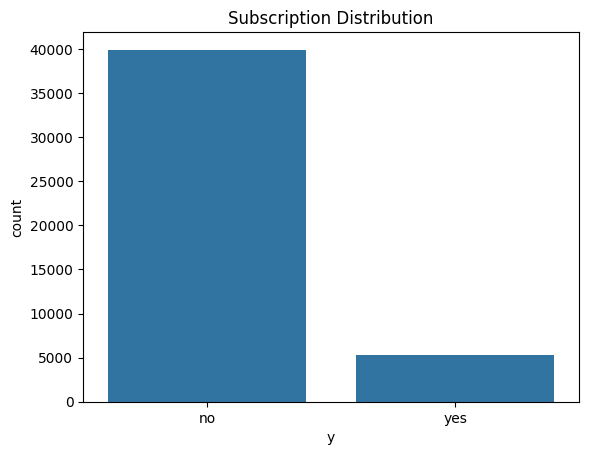

In [4]:
sns.countplot(data=df, x='y')
plt.title('Subscription Distribution')
plt.savefig('../results/plots/target_distribution.png')

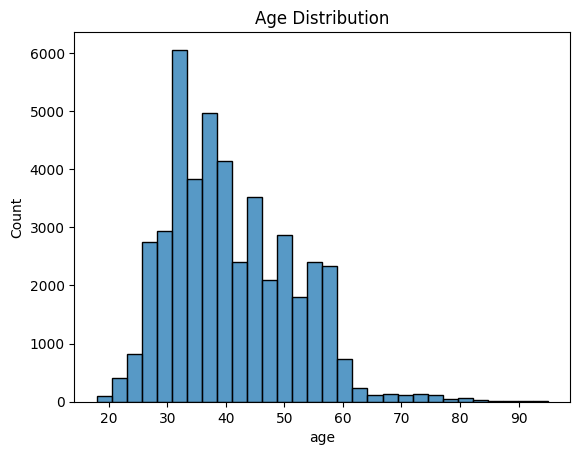

In [5]:
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.savefig('../results/plots/age_dist.png')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'no'),
  Text(1, 0, 'yes'),
  Text(2, 0, 'tertiary'),
  Text(3, 0, 'secondary'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'primary')])

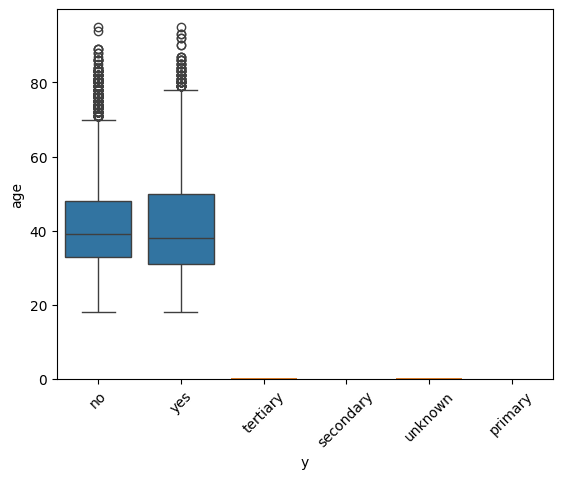

In [6]:
sns.boxplot(x='y', y='age', data=df)
sns.barplot(x='education', y=df['y'].apply(lambda x: 1 if x=='yes' else 0), data=df)
plt.xticks(rotation=45)

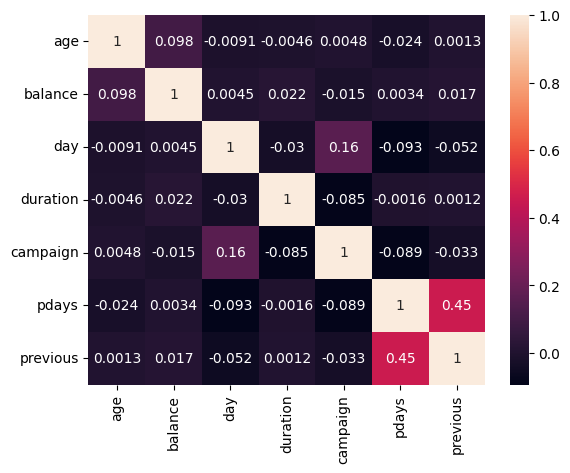

In [7]:
numeric_features = df.select_dtypes(include='number')
corr = numeric_features.corr()
sns.heatmap(corr, annot=True)
plt.savefig('../results/plots/correlation_heatmap.png')